Back-Testing Start
Sell 35 rate:8.2067030232435
Sell 36 rate:11.379173466237376
Buy 52 rate:20.1150439354907
Buy 56 rate:16.952444860407212
Sell 132 rate:9.514664035450933
Sell 140 rate:8.70758351364188
Sell 163 rate:10.812521427252829
Buy 167 rate:23.227373107277028
Buy 168 rate:27.99147932327518
Buy 169 rate:20.604577033821446
Buy 170 rate:22.19775379872275
Buy 171 rate:22.20596917599993
Buy 172 rate:16.39459859676339
Buy 173 rate:43.927352274431286
Sell 188 rate:8.729004099986774

수익률: 0.09246558101648698



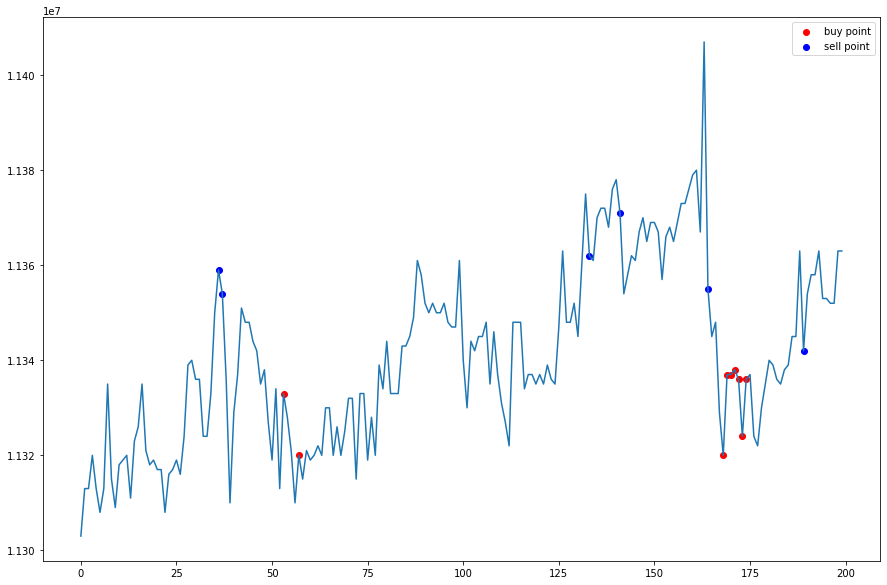

0.09246558101648698

In [4]:
import pyupbit
import backtesting
import pandas as pd

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute1")
df = pd.DataFrame(df)

def bothFilter(data):
    return data['close'].rolling(window=10).mean()

def buyfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * -1 * 60000
    if ret>100:
        return 100
    elif ret<16:
        return 0
    return ret

def sellfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * 30000
    if ret>100:
        return 100
    elif ret<8:
        return 0
    return ret

backtesting.SIMULATION(df, bothFilter,bothFilter, buyfunc, sellfunc)